<a href="https://colab.research.google.com/github/kordusmonika/convolutional_network/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
np.random.seed(0)

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPool2D, Conv2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

#Load the data

In [73]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


#Visualization

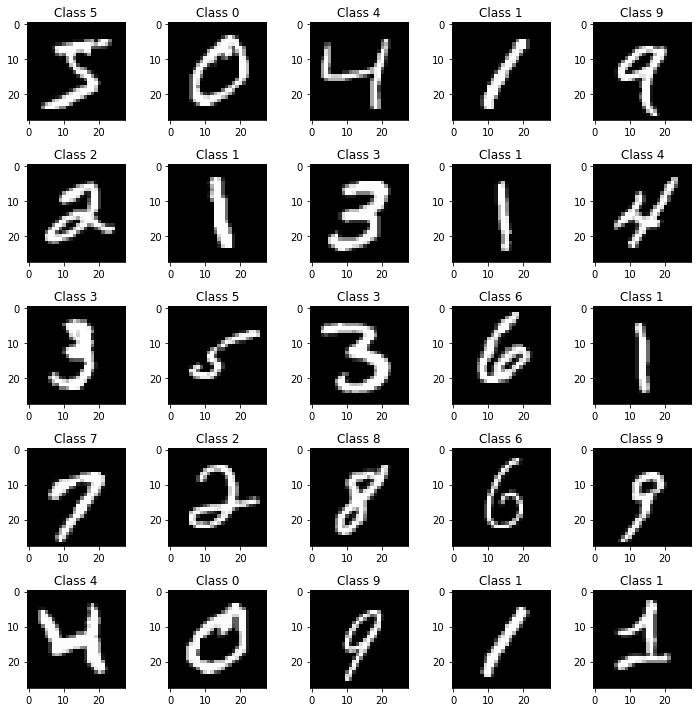

In [3]:
fig = plt.figure(figsize=(10,10))

for idx in range(25):
  plt.subplot(5,5, idx+1)
  plt.imshow(X_train[idx], cmap='gray', interpolation='none')
  plt.title('Class {}'.format(y_train[idx]))

plt.tight_layout()

#Data Preparation

In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


Adding RBG canal (1) using keras build-in backend

In [5]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_last':
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32')
  input_shape = (img_rows, img_cols, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
X_train /= 255
X_test /= 255

num_classes = 10

In [7]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


#Simple CNN

In [22]:
def get_simple_cnn():
  return Sequential([
        Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),

        Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),

        Flatten(),

        Dense(1024, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
  ])

model = get_simple_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['Accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

In [25]:
history = model.fit(X_train, y_train,
                    batch_size=256, epochs=12,
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/12
235/235 - 3s - loss: 0.0264 - accuracy: 0.0112 - val_loss: 0.0208 - val_accuracy: 0.0075
Epoch 2/12
235/235 - 3s - loss: 0.0244 - accuracy: 0.0132 - val_loss: 0.0195 - val_accuracy: 0.0116
Epoch 3/12
235/235 - 3s - loss: 0.0235 - accuracy: 0.0150 - val_loss: 0.0209 - val_accuracy: 0.0129
Epoch 4/12
235/235 - 3s - loss: 0.0205 - accuracy: 0.0176 - val_loss: 0.0196 - val_accuracy: 0.0182
Epoch 5/12
235/235 - 3s - loss: 0.0197 - accuracy: 0.0218 - val_loss: 0.0230 - val_accuracy: 0.0161
Epoch 6/12
235/235 - 3s - loss: 0.0183 - accuracy: 0.0224 - val_loss: 0.0194 - val_accuracy: 0.0218
Epoch 7/12
235/235 - 3s - loss: 0.0163 - accuracy: 0.0253 - val_loss: 0.0232 - val_accuracy: 0.0330
Epoch 8/12
235/235 - 3s - loss: 0.0174 - accuracy: 0.0250 - val_loss: 0.0191 - val_accuracy: 0.0236
Epoch 9/12
235/235 - 3s - loss: 0.0152 - accuracy: 0.0287 - val_loss: 0.0241 - val_accuracy: 0.0410
Epoch 10/12
235/235 - 3s - loss: 0.0151 - accuracy: 0.0329 - val_loss: 0.0214 - val_accuracy: 0.0306

In [26]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.01976219192147255
Test accuracy: 0.0435199998319149
CNN Error: 95.65%


#Doubled CNN

In [27]:
def get_double_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25), 
        
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(), # spłaszczanie danych, aby połączyć warstwy konwolucyjne z fully connected layers
        
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

model = get_double_cnn()
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 4, 4, 64)         

In [28]:
history = model.fit(X_train, y_train,
          batch_size=256,
          epochs=8,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/8
235/235 [==============================] - 6s 26ms/step - loss: 0.2909 - accuracy: 0.9059 - val_loss: 0.0457 - val_accuracy: 0.9845
Epoch 2/8
235/235 [==============================] - 6s 25ms/step - loss: 0.0768 - accuracy: 0.9768 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 3/8
235/235 [==============================] - 6s 25ms/step - loss: 0.0542 - accuracy: 0.9829 - val_loss: 0.0263 - val_accuracy: 0.9905
Epoch 4/8
235/235 [==============================] - 6s 25ms/step - loss: 0.0451 - accuracy: 0.9859 - val_loss: 0.0224 - val_accuracy: 0.9922
Epoch 5/8
235/235 [==============================] - 6s 25ms/step - loss: 0.0361 - accuracy: 0.9890 - val_loss: 0.0260 - val_accuracy: 0.9904
Epoch 6/8
235/235 [==============================] - 6s 25ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0200 - val_accuracy: 0.9935
Epoch 7/8
235/235 [==============================] - 6s 25ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.0180 - val_accuracy: 0.9933
Epoch 

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.018344415351748466
Test accuracy: 0.9944000244140625
CNN Error: 0.56%


#Third CNN

In [30]:
def get_triple_cnn():
    return Sequential([
        Conv2D(32, kernel_size=(3,3),activation='relu', input_shape=input_shape, padding='same'),
        Conv2D(32, kernel_size=(3,3),activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        Dropout(0.25),
        
        Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(64, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size=(2,2)),
        
        Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'),
        Conv2D(128, kernel_size=(3,3), activation='relu'),
        MaxPool2D(pool_size = (2,2)),
        Dropout(0.25),
        
        Flatten(),
        
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')

        
    ])

model = get_triple_cnn()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)         

In [31]:
history = model.fit(X_train, y_train,
          batch_size=128,
          epochs=12,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/12
469/469 [==============================] - 10s 22ms/step - loss: 0.3480 - accuracy: 0.8895 - val_loss: 0.0467 - val_accuracy: 0.9860
Epoch 2/12
469/469 [==============================] - 10s 21ms/step - loss: 0.0857 - accuracy: 0.9768 - val_loss: 0.0325 - val_accuracy: 0.9897
Epoch 3/12
469/469 [==============================] - 10s 22ms/step - loss: 0.0587 - accuracy: 0.9842 - val_loss: 0.0320 - val_accuracy: 0.9898
Epoch 4/12
469/469 [==============================] - 10s 21ms/step - loss: 0.0466 - accuracy: 0.9876 - val_loss: 0.0311 - val_accuracy: 0.9896
Epoch 5/12
469/469 [==============================] - 10s 22ms/step - loss: 0.0356 - accuracy: 0.9903 - val_loss: 0.0234 - val_accuracy: 0.9929
Epoch 6/12
469/469 [==============================] - 10s 22ms/step - loss: 0.0317 - accuracy: 0.9911 - val_loss: 0.0255 - val_accuracy: 0.9931
Epoch 7/12
469/469 [==============================] - 10s 22ms/step - loss: 0.0302 - accuracy: 0.9917 - val_loss: 0.0202 - val_accuracy:

In [32]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.02204618975520134
Test accuracy: 0.993399977684021
CNN Error: 0.66%


#Where do we have mistakes?

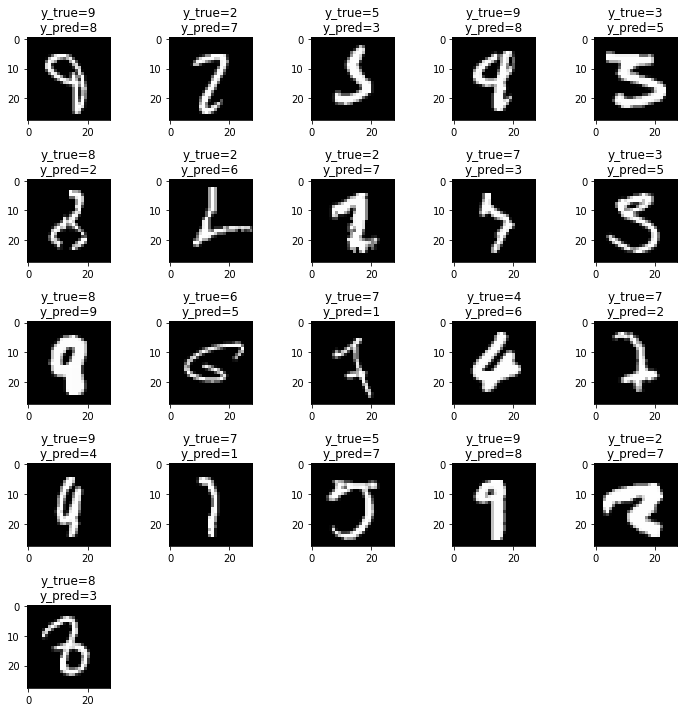

In [34]:
y_pred = model.predict(X_test)

def get_diff(y_test, y_pred):
    for idx, (a, b) in enumerate(zip(y_test, y_pred)):
        if np.argmax(a) == np.argmax(b): continue
        yield idx, np.argmax(a), np.argmax(b)

limit = 20
cur_limit = 0
fig = plt.figure(figsize=(10, 10))
X_test_plot = X_test.reshape( X_test.shape[:-1] )

for it, (idx, y_test_val, y_pred_val) in enumerate(get_diff(y_test, y_pred)):
    if cur_limit > limit: break
      
    plt.subplot(5,5,it+1)
    plt.imshow(X_test_plot[idx], cmap='gray', interpolation='none')
    plt.title('y_true={0}\ny_pred={1}'.format(y_test_val, y_pred_val))
    plt.tight_layout()
        
    cur_limit += 1

#Summary

Simple: 95.65%, Doubled: 56%, Third: 66%. 

Looks like simply cnn got overfitted. Conversly double and third cnn made a little progress

#Let's try VGG16

Data Preparation - VGG requires 48x48 + 3RGB canals

In [124]:
import tensorflow as tf
from skimage.transform import resize
from tensorflow.keras.preprocessing import image

(X_train, y_train), (X_test, y_test) = mnist.load_data()

img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_last':
  X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1).astype('float32')
  X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1).astype('float32')
  input_shape = (img_rows, img_cols, 1)
print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [118]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
#X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.repeat(3, -1)  # repeat the last (-1) dimension three times
X_t = tf.convert_to_tensor(X_train)
assert X_t.shape == (60000, 28, 28, 3)


#X_test = X.reshape((10000, 28, 28, 1))
X_test = X_test.repeat(3, -1)  # repeat the last (-1) dimension three times
X_t = tf.convert_to_tensor(X_test)
assert X_t.shape == (10000, 28, 28, 3)

In [126]:
X_train.shape, X_test.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [0]:
X_train_48 = []
X_test_48 = []

for i in tqdm(range(X_train.shape[0])):
    resized_img = resize(X_train[i], output_shape=(48, 48), mode='reflect')
    X_train_48.append(resized_img)
    
X_train_48 = np.array(X_train_48)
    
for i in tqdm(range(X_test.shape[0])):
    resized_img = resize(X_test[i], output_shape=(48, 48), mode='reflect')
    X_test_48.append(resized_img)
    
X_test_48 = np.array(X_test_48)

In [129]:
print(X_train_48.shape, X_test_48.shape)

(60000, 48, 48, 3) (10000, 48, 48, 3)


In [0]:
X_train_48 /= 255
X_test_48 /= 255

num_classes = 10

In [134]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


#Basic Model - all convolutional layers are frozen (layer.trainable=False), we will focus solely on MLP

In [135]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in base_model.layers:
    layer.trainable = False


model = Sequential([
    base_model,
    
    Flatten(), 
        
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [136]:
history = model.fit(X_train_48, y_train,
          batch_size=1024,
          epochs=3,
          verbose=1,
          validation_data=(X_test_48, y_test))

Epoch 1/3
59/59 [==============================] - 42s 708ms/step - loss: 1.2631 - accuracy: 0.6264 - val_loss: 0.6118 - val_accuracy: 0.8483
Epoch 2/3
59/59 [==============================] - 34s 575ms/step - loss: 0.5090 - accuracy: 0.8606 - val_loss: 0.3524 - val_accuracy: 0.9132
Epoch 3/3
59/59 [==============================] - 34s 575ms/step - loss: 0.3423 - accuracy: 0.9062 - val_loss: 0.2596 - val_accuracy: 0.9329


In [139]:
score = model.evaluate(X_test_48, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("CNN Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.2460642009973526
Test accuracy: 0.9358999729156494
CNN Error: 6.41%


#CNN dropped to ~ 6.41%.
